In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as DT
import matplotlib.dates

In [17]:
#import driver data from csv
driver = pd.read_csv('driver_ids.csv')

#check driver data basic summary 
driver.describe()

,driver_id,driver_onboard_date
count,937,937
unique,937,49
top,a85adc80be31a10c23b7aaf380e39173,2016-04-05 00:00:00
freq,1,36


In [18]:
#check if there is missing value
driver.isnull().sum()

driver_id              0
driver_onboard_date    0
dtype: int64

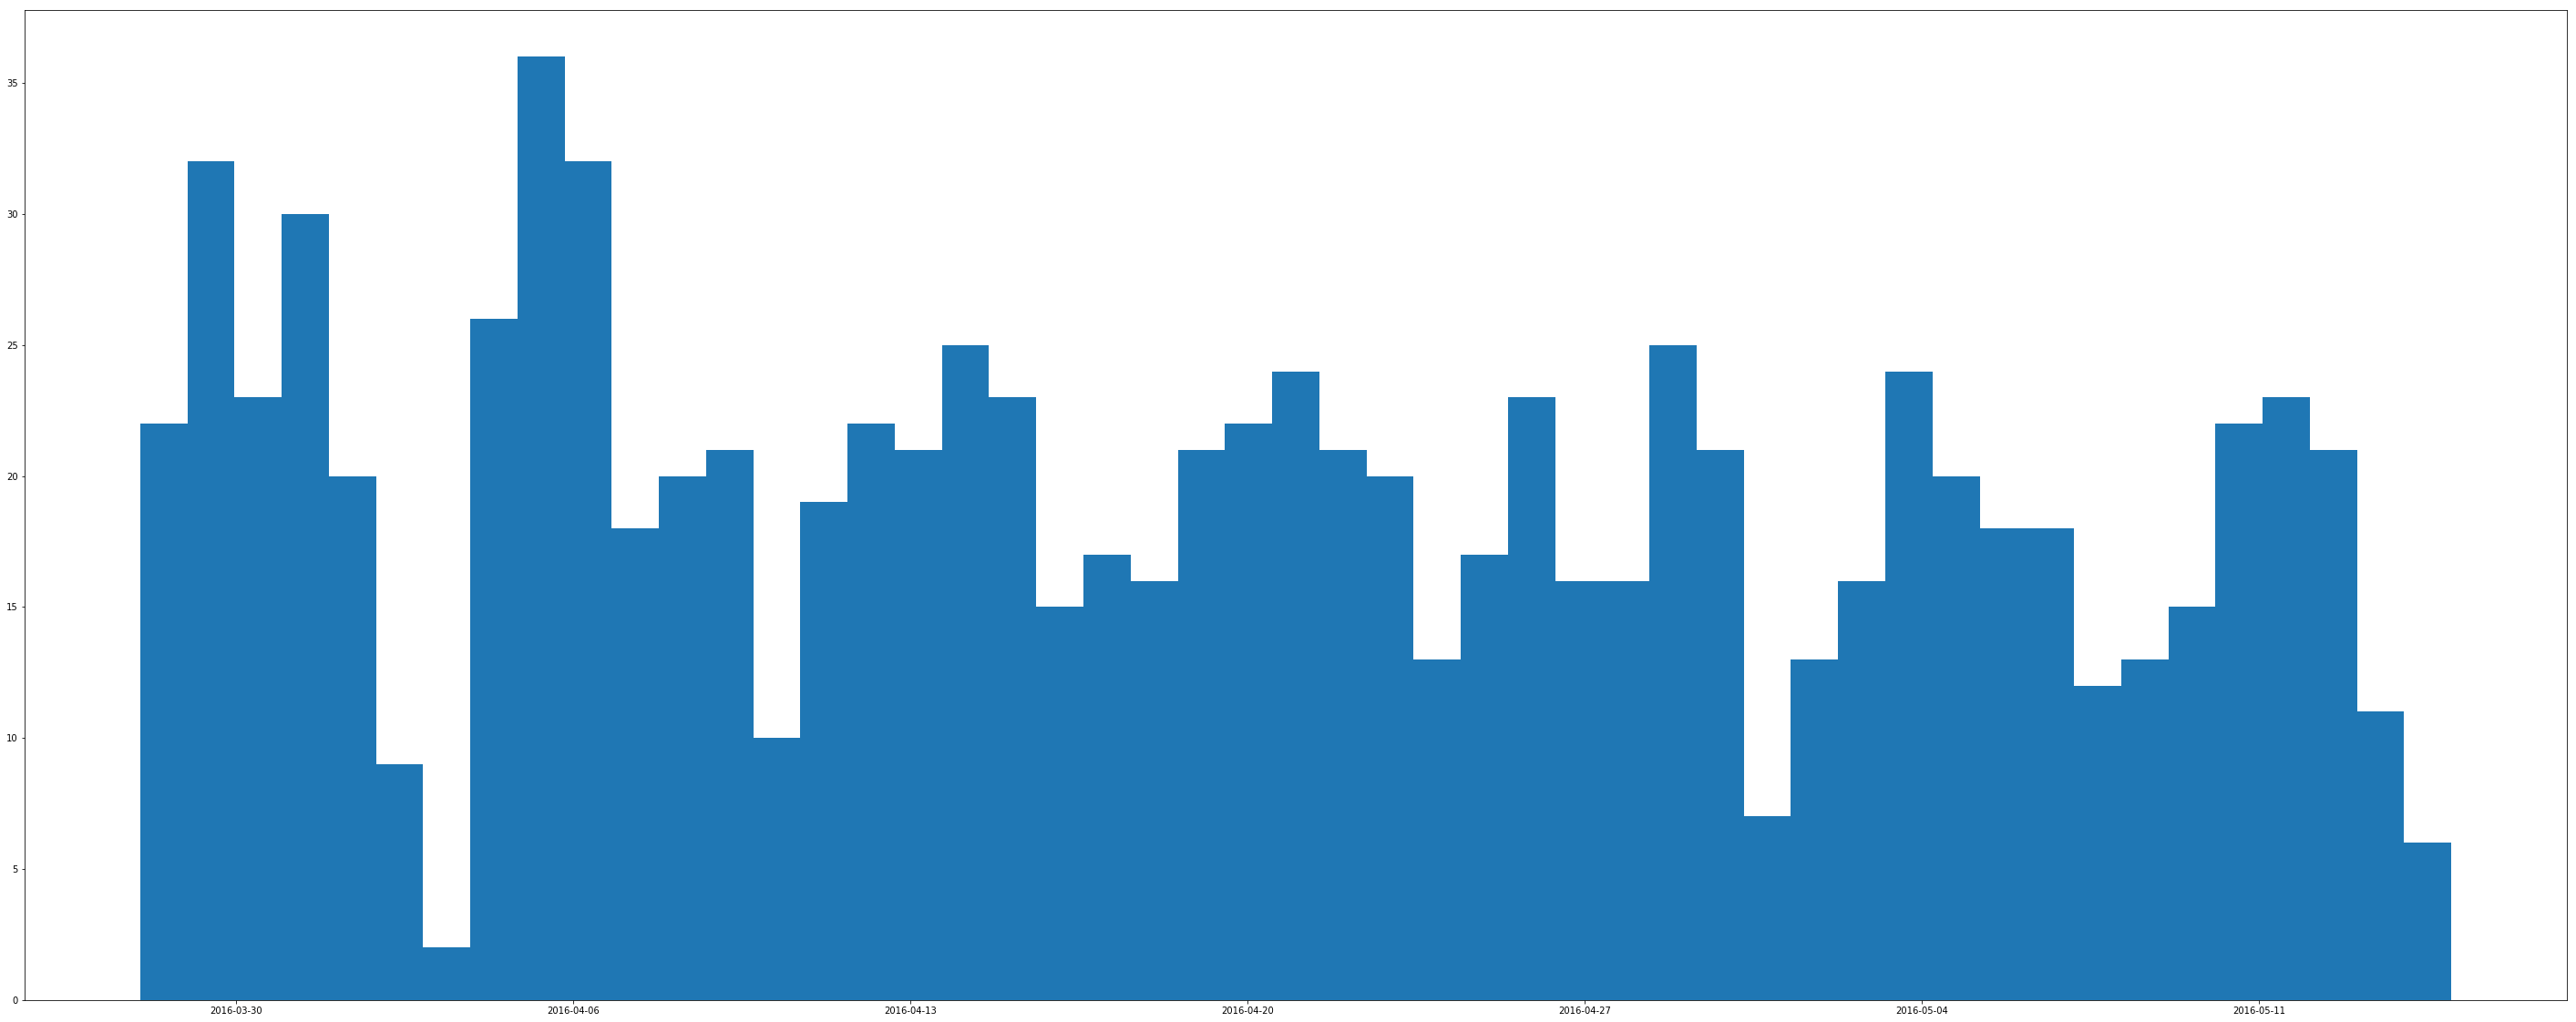

In [22]:
#look at driver onboard date distribution
min_date = min(driver['driver_onboard_date'])
max_date = max(driver['driver_onboard_date'])
print(min_date)
print(max_date)

date_strings = [date.replace(' 00:00:00', '') for date in driver['driver_onboard_date']]
date_objects = [DT.datetime.strptime(date, '%Y-%m-%d') for date in date_strings]

date_strings = set(date_strings)
date_obj_set = [DT.datetime.strptime(date, '%Y-%m-%d') for date in date_strings]
date_obj_set.sort()
days = (date_obj_set[-1] - date_obj_set[0]).days


plt.rcParams["figure.figsize"] = [50,20]
plt.hist(date_objects, bins=days+1)


plt.show()

In [57]:
#fig_size = plt.rcParams["figure.figsize"]
tick_size=plt.tick_params(labelsize=20)
print(tick_size)

None


In [62]:
driver.describe()
driver['driver_onboard_date'].describe()

count                     937
unique                     49
top       2016-04-05 00:00:00
freq                       36
Name: driver_onboard_date, dtype: object

In [29]:
driver.isnull().sum()

driver_id              0
driver_onboard_date    0
dtype: int64

In [14]:
ride = pd.read_csv('ride_ids.csv')
ride.describe()

,ride_distance,ride_duration,ride_prime_time
count,193502.000000,193502.000000,193502.000000
mean,6955.218266,858.966099,17.305893
std,8929.444606,571.375818,30.825800
min,-2.000000,2.000000,0.000000
25%,2459.000000,491.000000,0.000000
50%,4015.000000,727.000000,0.000000
75%,7193.000000,1069.000000,25.000000
max,724679.000000,28204.000000,500.000000


In [12]:
#import ride ts data
ride_ts = pd.read_csv('ride_timestamps.csv')

#quliaty check to see if every ride has all 5 events
events_per_ride = ride_ts.groupby(['ride_id']).nunique()
events_per_ride.describe()

,ride_id,event,timestamp
count,194081.0,194081.0,194081.000000
mean,1.0,5.0,4.878391
std,0.0,0.0,0.329926
min,1.0,5.0,3.000000
25%,1.0,5.0,5.000000
50%,1.0,5.0,5.000000
75%,1.0,5.0,5.000000
max,1.0,5.0,5.000000


for the 

In [13]:
#use drop off ts as the completion time
ride_cmplt_ts = ride_ts[ride_ts['event']=='dropped_off_at']
ride_cmplt_ts.describe(

,ride_id,event,timestamp
count,194081,194081,194081
unique,194081,1,190468
top,51b44538f52ef231421b782e947b0b67,dropped_off_at,2016-06-03 18:59:26
freq,1,194081,4


In [25]:
ride = pd.read_csv('ride_ids.csv')

driver_ride = pd.merge(driver, ride, how= 'outer', left_on='driver_id', right_on='driver_id')

#driver_ride.isnull().sum()


driver_id                 0
driver_onboard_date    7611
ride_id                  83
ride_distance            83
ride_duration            83
ride_prime_time          83
dtype: int64